In [1]:
import pandas as pd

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
!unzip data.csv.zip

Archive:  data.csv.zip
  inflating: data.csv                
  inflating: __MACOSX/._data.csv     


In [4]:
data_df = pd.read_csv('data.csv')

/Users/ricalanis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (9,12,13,16,21,28,32,33,34,35,36,37,40,41,42,43,44,45,46,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
data_df['Calle'].value_counts()[0:10]

MORONES PRIETO      1729
LAZARO CARDENAS     1279
GONZALITOS          1229
GARZA SADA          1215
ALFONSO REYES       1153
JOSE VASCONCELOS     964
LEONES               891
AV. LINCOLN          838
CONSTITUCION         823
FIDEL VELAZQUEZ      752
Name: Calle, dtype: int64

In [8]:
data_df.columns

Index(['Column', 'Calle', 'Causa', 'Ciudad', 'Cruce', 'Fecha', 'Hora', 'ID',
       'Latitud', 'Lesionados', 'Longitud', 'Mes', 'Muertos',
       'No. De Infracción', 'Número  total de lesionados',
       'Número total de muertos', 'Por alcohol', 'Sentido',
       'Situación climática', 'Situación del Pavimento', 'Tipo de incidente',
       'Tipo de involucrado', 'Tipo de vía', 'V1_Arresto', 'V1_Dictamen',
       'V1_Edad', 'V1_Estatus Licencia', 'V1_Género', 'V1_No. De Fallecidos',
       'V1_No. De Lesionados', 'V1_Tipo de Vehículo', 'V1_Uso de Cinturón',
       'V2_Arresto', 'V2_Dictamen', 'V2_Edad', 'V2_Estatus Licencia',
       'V2_Género', 'V2_No. De Fallecidos', 'V2_No. De Lesionados',
       'V2_Tipo de Vehículo', 'V2_Uso de Cinturón', 'V3_Arresto',
       'V3_Dictamen', 'V3_Edad', 'V3_Estatus Licencia', 'V3_Género',
       'V3_No. De Fallecidos', 'V3_No. De Lesionados', 'V3_Tipo de Vehículo',
       'V3_Uso de Cinturón'],
      dtype='object')

In [27]:
import numpy as np

In [28]:
np.nan

nan

In [29]:
def convert_to_number(x):
    try:
        return float(x)
    except:
        return np.nan
    return x

<AxesSubplot:>

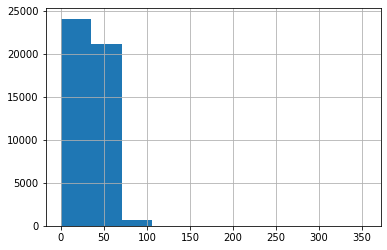

In [32]:
data_df['V1_Edad'].apply(convert_to_number).hist()

In [41]:
data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts()

No    428
Sí     82
Name: Por alcohol, dtype: int64

In [42]:
sum(data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts())

510

In [43]:
data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts()/sum(data_df[data_df['Calle'] == 'GARZA SADA']['Por alcohol'].value_counts())

No    0.839216
Sí    0.160784
Name: Por alcohol, dtype: float64